# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import holoviews as hv
import plotly.graph_objects as go
from holoviews import opts
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../dat/dips/DIPS_Data.csv", sep = ",", low_memory = False)
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change_idx.csv", sep = ",", low_memory = False)
data_change_excl = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change_excl.csv", sep = ",", low_memory = False)

In [3]:
# y_pred_lr = pd.read_csv("01_ML/y_pred_ML/y_pred_lr.csv", sep =",")
y_pred_lr_excl = pd.read_csv("01_ML/y_pred_ML/y_pred_lr_excl.csv", sep =",")
# y_pred_rf = pd.read_csv("01_ML/y_pred_ML/y_pred_rf.csv", sep =",")
# y_pred_svc = pd.read_csv("01_ML/y_pred_ML/y_pred_svc.csv", sep =",")
# y_pred_dnn = pd.read_csv("01_ML/y_pred_ML/y_pred_dnn.csv", sep =",")
# y_pred_knn = pd.read_csv("01_ML/y_pred_ML/y_pred_knn.csv", sep =",")
y_pred_knn_excl = pd.read_csv("01_ML/y_pred_ML/y_pred_knn_excl.csv", sep =",")
# y_pred_nb = pd.read_csv("01_ML/y_pred_ML/y_pred_nb.csv", sep =",")
y_pred_nb_excl = pd.read_csv("01_ML/y_pred_ML/y_pred_nb_excl.csv", sep =",")

In [4]:
y_pred_GPT_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_simple_prompt.csv", sep =",")
y_pred_GPT_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_class_definitions_prompt.csv", sep =",")
y_pred_GPT_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_few_shot_prompt.csv", sep =",")
y_pred_GPT_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_vignette_prompt.csv", sep =",")
y_pred_GPT_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_cot_prompt.csv", sep =",")

In [5]:
y_pred_GPT_o3_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_simple_prompt.csv", sep =",")
y_pred_GPT_o3_class_definitions_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_class_definitions_prompt.csv", sep =",")
y_pred_GPT_o3_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_o3_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_few_shot_prompt.csv", sep =",")
y_pred_GPT_o3_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_vignette_prompt.csv", sep =",")
y_pred_GPT_o3_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_cot_prompt.csv", sep =",")

In [6]:
y_pred_Gemini_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_simple_prompt.csv", sep =",")
y_pred_Gemini_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_class_definitions_prompt.csv", sep =",")
y_pred_Gemini_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_profiled_simple_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt.csv", sep =",")
y_pred_Gemini_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_vignette_prompt.csv", sep =",")
y_pred_Gemini_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_cot_prompt.csv", sep =",")

In [7]:
y_pred_Gemma_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_simple_prompt.csv", sep =",")
y_pred_Gemma_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_class_definitions_prompt.csv", sep =",")
y_pred_Gemma_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_profiled_simple_prompt.csv", sep =",")
y_pred_Gemma_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_few_shot_prompt.csv", sep =",")
y_pred_Gemma_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_vignette_prompt.csv", sep =",")
y_pred_Gemma_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_cot_prompt.csv", sep =",")

In [8]:
y_pred_Claude_4_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_simple_prompt.csv", sep =",")
y_pred_Claude_4_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_class_definitions_prompt.csv", sep =",")
y_pred_Claude_4_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/Claude/y_pred_claude_profiled_simple_prompt.csv", sep =",")
y_pred_Claude_4_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_few_shot_prompt.csv", sep =",")
y_pred_Claude_4_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_vignette_prompt.csv", sep =",")
y_pred_Claude_4_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_cot_prompt.csv", sep =",")

In [9]:
y_pred_DeepSeek_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_simple_prompt.csv", sep =",")
y_pred_DeepSeek_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_class_definitions_prompt.csv", sep =",")
y_pred_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_profiled_simple_prompt.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt_20.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt.csv", sep =",")
y_pred_DeepSeek_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_vignette_prompt.csv", sep =",")
y_pred_DeepSeek_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_cot_prompt.csv", sep =",")

In [10]:
y_pred_Grok_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_simple_prompt.csv", sep =",")
y_pred_Grok_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_class_definitions_prompt.csv", sep =",")
y_pred_Grok_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_profiled_simple_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt_20.csv", sep =",")
y_pred_Grok_few_shot_prompt_100 = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt_100.csv", sep =",")
y_pred_Grok_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_vignette_prompt.csv", sep =",")
y_pred_Grok_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_cot_prompt.csv", sep =",")

In [11]:
X_train_GPT_4_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_simple_prompt.csv", sep = ",")
X_train_GPT_4_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_class_definitions_prompt.csv", sep = ",")
X_train_GPT_4_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_profiled_simple_prompt.csv", sep = ",")
X_train_GPT_4_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_few_shot_prompt.csv", sep = ",")
X_train_GPT_4_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_vignette_prompt.csv", sep = ",")
X_train_GPT_4_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_cot_prompt.csv", sep = ",")

In [12]:
X_train_GPT_o3_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_simple_prompt.csv", sep = ",")
X_train_GPT_o3_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_class_definitions_prompt.csv", sep = ",")
X_train_GPT_o3_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_profiled_simple_prompt.csv", sep = ",")
X_train_GPT_o3_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_few_shot_prompt.csv", sep = ",")
X_train_GPT_o3_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_vignette_prompt.csv", sep = ",")
X_train_GPT_o3_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_cot_prompt.csv", sep = ",")

In [13]:
X_train_Gemma_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_simple_prompt.csv", sep = ",")
X_train_Gemma_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_class_definitions_prompt.csv", sep = ",")
X_train_Gemma_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_profiled_simple_prompt.csv", sep = ",")
X_train_Gemma_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_few_shot_prompt.csv", sep = ",")
X_train_Gemma_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_vignette_prompt.csv", sep = ",")
X_train_Gemma_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_cot_prompt.csv", sep = ",")

In [14]:
X_train_Claude_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_simple_prompt.csv", sep = ",")
X_train_Claude_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_class_definitions_prompt.csv", sep = ",")
X_train_Claude_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_profiled_simple_prompt.csv", sep = ",")
X_train_Claude_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_few_shot_prompt.csv", sep = ",")
X_train_Claude_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_vignette_prompt.csv", sep = ",")
X_train_Claude_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_cot_prompt.csv", sep = ",")

In [15]:
X_train_DeepSeek_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_simple_prompt.csv", sep = ",")
X_train_DeepSeek_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_class_definitions_prompt.csv", sep = ",")
X_train_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_profiled_simple_prompt.csv", sep = ",")
X_train_DeepSeek_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_few_shot_prompt.csv", sep = ",")
X_train_DeepSeek_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_vignette_prompt.csv", sep = ",")
X_train_DeepSeek_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_cot_prompt.csv", sep = ",")

In [16]:
X_train_Grok_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_simple_prompt.csv", sep = ",")
X_train_Grok_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_class_definitions_prompt.csv", sep = ",")
X_train_Grok_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_profiled_simple_prompt.csv", sep = ",")
X_train_Grok_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_few_shot_prompt.csv", sep = ",")
X_train_Grok_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_vignette_prompt.csv", sep = ",")
X_train_Grok_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_cot_prompt.csv", sep = ",")

# Merging

In [17]:
data = pd.read_csv("../dat/dips/DIPS_Data.csv", sep = ",", low_memory = False)
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change_idx.csv", sep = ",", low_memory = False)
data_change_excl = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change_excl.csv", sep = ",", low_memory = False)

In [18]:
data_change_excl_idx = data_change_excl.copy()
data_change_excl_idx["original_idx"] = data_change_excl["Unnamed: 0"]
data_change_excl_idx = data_change_excl_idx.set_index("Unnamed: 0")

data_change_idx = data_change.copy()
data_change_idx["original_idx"] = data_change["Unnamed: 0"]
data_change_idx = data_change_idx.set_index("Unnamed: 0")

data_change_merged = data_change_idx.merge(data_change_excl_idx["hpi"], on = "Unnamed: 0", how = "left", suffixes = ("", "_excl"))
data_change_merged["idx"] = range(len(data_change_merged))
data_change_merged.set_index("idx", inplace = True)
data_change_merged

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,soz_change,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change,hpi,original_idx,hpi_excl
idx,,,,,,,,,,,,,,,,,,,,,
0,1.905045,-1.858903,-0.994979,-1.928212,2.441714,0.062486,-0.359417,1.612646,0.764021,0.566822,...,2.753129,2.029671,1.900449,-2.518013,-1.431081,-2.600931,-2.639135,0.0,0,0.0
1,0.455324,-0.434443,-0.088340,0.660932,0.041981,0.413949,-1.169769,0.423639,-0.382329,0.941935,...,0.204409,0.647389,-0.211204,-0.585676,-0.262880,0.105940,-0.073737,0.0,1,0.0
2,3.838008,-0.701529,-0.315000,-1.280926,0.041981,-0.113246,1.261288,0.291528,-0.286800,0.441785,...,0.315223,0.094477,0.316709,1.070613,-0.262880,-0.164747,1.783966,0.0,4,NaN
3,-0.511158,0.990016,0.138320,0.175467,-0.957908,-1.079771,-0.521487,-0.369032,0.477433,0.024994,...,-0.017219,0.647389,0.492680,-0.723700,-1.041680,-0.489571,0.147418,0.0,5,NaN
4,-0.027917,-1.947932,0.591639,-1.280926,-0.357975,-0.640441,-0.440452,-1.690150,-1.337621,1.525442,...,3.639640,0.923846,2.476355,0.518517,0.321221,-3.034031,-0.162199,1.0,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,-0.511158,0.277787,-1.221639,-0.148176,-1.157886,-1.343368,-0.359417,0.555751,-0.018124,0.275069,...,-0.460475,0.370933,0.844622,-0.723700,0.826225,-1.355770,0.893382,0.0,1531,0.0
1225,-0.511158,-0.790558,-0.541660,0.822753,-0.757930,-0.376844,-0.278381,1.084199,0.477433,1.066972,...,0.758478,-1.011349,-1.794945,0.242469,-0.068179,-1.518183,-0.692971,0.0,1533,NaN
1226,-0.511158,-0.523472,-0.315000,0.013646,0.241958,0.238217,0.288865,-1.293815,-1.242092,-0.308439,...,-0.349661,0.370933,1.372536,1.346661,0.710621,-0.814396,0.191649,0.0,1534,0.0


In [19]:
# Predictors
X = data_change_merged
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change_merged["hpi"]

# Train-test split
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("LLMs \n",
      "X_train shape: ", X_train_old.shape, round(X_train_old.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test_old.shape, round(X_test_old.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train_old.shape, round(y_train_old.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test_old.shape, round(y_test_old.shape[0]/len(y), 2), "\n")

LLMs 
 X_train shape:  (983, 24) 0.8 
 X_test shape:  (246, 24) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [20]:
X_train_old["LLM_idx"] = range(len(X_train_old))
X_test_old["LLM_idx"] = range(len(X_test_old))
X_test_old

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,soz_change,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change,original_idx,hpi_excl,LLM_idx
idx,,,,,,,,,,,,,,,,,,,,,
372,-0.027917,0.142124,0.364979,0.337289,0.441936,1.731937,0.207830,0.159416,0.286375,0.275069,...,0.705710,-0.181980,0.140738,-0.861724,-0.846980,0.484902,-0.825664,458,0.0,0
484,-0.027917,1.079045,-2.354937,-0.471819,0.041981,0.853278,-0.845628,0.555751,1.241667,-0.225081,...,-0.460475,1.753215,0.316709,0.518517,1.781472,0.809727,-1.091050,595,1.0,1
1046,-0.994398,0.811959,2.404917,0.984575,-0.957908,2.698461,-0.764593,-0.369032,0.286375,-1.308738,...,0.204409,0.094477,1.548507,-1.137772,-1.431081,0.430765,0.368574,1290,0.0,2
1031,-0.027917,0.900988,0.364979,1.631861,-0.957908,0.150351,-0.278381,-1.161703,-1.242092,-1.100342,...,-0.571288,-0.458436,-0.035233,2.864926,2.754973,1.188689,0.191649,1269,0.0,3
541,-0.511158,0.811959,0.591639,1.470039,-0.957908,-0.288978,-0.602522,-1.029591,-0.764446,-1.016984,...,-0.349661,-4.052369,-1.091060,-0.033579,-0.360230,-1.030946,-0.250661,666,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,-0.511158,0.722930,0.818299,0.660932,0.841892,-0.376844,-0.926663,-0.236920,-0.382329,-1.683850,...,-0.238847,-0.734893,-0.563147,-0.861724,-0.360230,0.863864,0.633960,33,0.0,241
1134,-0.511158,-0.167357,0.364979,0.337289,-1.157886,-1.343368,-0.440452,-0.104808,-0.286800,0.900255,...,-0.017219,-0.734893,-0.739118,-0.033579,0.223871,-0.110610,-0.065785,1413,0.0,242
377,0.455324,0.277787,-0.541660,-0.309997,-0.957908,1.995534,2.476817,0.687863,-0.955504,-0.641872,...,-2.787567,-1.287805,-1.443003,-0.861724,0.223871,2.000750,-0.029506,465,NaN,243


In [21]:
X_train_old

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,soz_change,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change,original_idx,hpi_excl,LLM_idx
idx,,,,,,,,,,,,,,,,,,,,,
929,-0.027917,0.188758,-0.768319,-4.988109,0.041981,-0.113246,-0.035276,0.027304,-1.051033,0.108352,...,0.315223,0.094477,7.163587,-0.309628,0.515921,0.972139,0.368574,1145,0.0,0
805,-0.994398,-1.324730,-0.088340,0.013646,-0.357975,-0.201112,1.099218,-0.897479,-0.668917,-0.475156,...,1.423362,-0.181980,0.316709,-0.171604,0.418571,0.918002,-2.550673,993,0.0,1
854,-0.994398,0.722930,1.498278,0.660932,-1.157886,0.589681,-1.818051,-0.897479,-0.859975,-1.933925,...,-0.349661,-0.458436,0.492680,0.242469,-0.068179,1.188689,0.457036,1055,0.0,2
1045,-0.511158,-0.790558,-0.768319,0.660932,0.441936,-0.991905,2.071641,-0.104808,-0.000212,0.316748,...,0.204409,-0.458436,-0.563147,0.242469,0.126521,0.376627,-0.094610,1289,0.0,3
36,-0.027917,0.990016,1.724938,-0.795462,-1.157886,0.853278,-0.359417,-0.236920,0.095317,-1.016984,...,-0.128033,-1.011349,1.900449,-0.585676,-1.041680,-0.327159,0.722422,46,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,-0.511158,0.010700,-0.541660,-0.148176,0.641914,-0.288978,-0.116311,1.084199,0.095317,1.400405,...,-0.017219,-0.458436,1.020594,-0.171604,0.029171,0.051803,0.678191,1236,0.0,978
79,-0.511158,1.079045,0.138320,1.308218,-1.557841,-1.255502,-1.574945,-0.897479,-1.146563,-0.350118,...,-0.460475,-0.181980,-0.739118,-0.033579,0.223871,0.701452,0.191649,98,0.0,979
478,-0.994398,0.455844,-0.315000,-0.148176,-0.957908,-0.464710,1.342323,-0.236920,-0.859975,0.108352,...,-0.349661,0.370933,0.316709,-0.033579,0.126521,0.322490,-0.073737,586,1.0,980


In [22]:
# get all indices that contain NA in X_train
NA_indices_train = X_train_old[X_train_old.isna().any(axis=1)].index.tolist()
NA_indices_test = X_test_old[X_test_old.isna().any(axis=1)].index.tolist()
NA_indices = NA_indices_train + NA_indices_test
NA_indices

[589,
 371,
 210,
 239,
 812,
 780,
 1119,
 125,
 243,
 1125,
 717,
 937,
 50,
 84,
 523,
 349,
 2,
 1043,
 913,
 836,
 1185,
 649,
 845,
 99,
 994,
 483,
 151,
 1087,
 1178,
 1160,
 237,
 888,
 940,
 556,
 492,
 406,
 443,
 884,
 1099,
 722,
 225,
 320,
 931,
 1228,
 976,
 268,
 896,
 387,
 1015,
 685,
 588,
 361,
 663,
 924,
 953,
 228,
 283,
 607,
 936,
 1157,
 706,
 73,
 51,
 446,
 489,
 576,
 78,
 628,
 513,
 319,
 343,
 1209,
 437,
 1121,
 894,
 13,
 1006,
 100,
 465,
 188,
 263,
 510,
 597,
 577,
 3,
 583,
 187,
 415,
 1115,
 1153,
 938,
 623,
 905,
 363,
 1183,
 148,
 451,
 322,
 97,
 1071,
 332,
 781,
 1019,
 55,
 819,
 965,
 837,
 869,
 584,
 754,
 889,
 1010,
 503,
 712,
 46,
 858,
 504,
 178,
 1105,
 1066,
 879,
 1186,
 515,
 1049,
 211,
 947,
 431,
 1078,
 162,
 681,
 665,
 176,
 417,
 791,
 1077,
 1172,
 1112,
 175,
 1184,
 42,
 792,
 1084,
 1128,
 293,
 745,
 1012,
 713,
 1120,
 299,
 971,
 466,
 989,
 1073,
 180,
 160,
 163,
 1060,
 704,
 1050,
 1225,
 514,
 1042,
 644,

In [23]:
# y_train = y_train[~y_train.index.isin(NA_indices_train)]
# y_test = y_test[~y_test.index.isin(NA_indices_test)]

In [24]:
# train_indices = y_train_old.index.tolist()
# test_indices = y_test_old.index.tolist()

In [25]:
y_pred_GPT_o3_simple_prompt["LLM_idx"] = range(len(y_pred_GPT_o3_simple_prompt))
X_train_GPT_o3_simple_prompt["LLM_idx"] = range(len(X_train_GPT_o3_simple_prompt))

In [26]:
X_test_old["index"] = X_test_old.index
X_train_old["index"] = X_train_old.index

In [27]:
X_train_pred = X_train_old.merge(X_train_GPT_o3_simple_prompt, on = "LLM_idx", how = "left")
X_train_pred = X_train_pred.set_index("index")
X_train_pred

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change,original_idx,hpi_excl,LLM_idx,y_pred
index,,,,,,,,,,,,,,,,,,,,,
929,-0.027917,0.188758,-0.768319,-4.988109,0.041981,-0.113246,-0.035276,0.027304,-1.051033,0.108352,...,0.094477,7.163587,-0.309628,0.515921,0.972139,0.368574,1145,0.0,0,0
805,-0.994398,-1.324730,-0.088340,0.013646,-0.357975,-0.201112,1.099218,-0.897479,-0.668917,-0.475156,...,-0.181980,0.316709,-0.171604,0.418571,0.918002,-2.550673,993,0.0,1,0
854,-0.994398,0.722930,1.498278,0.660932,-1.157886,0.589681,-1.818051,-0.897479,-0.859975,-1.933925,...,-0.458436,0.492680,0.242469,-0.068179,1.188689,0.457036,1055,0.0,2,0
1045,-0.511158,-0.790558,-0.768319,0.660932,0.441936,-0.991905,2.071641,-0.104808,-0.000212,0.316748,...,-0.458436,-0.563147,0.242469,0.126521,0.376627,-0.094610,1289,0.0,3,0
36,-0.027917,0.990016,1.724938,-0.795462,-1.157886,0.853278,-0.359417,-0.236920,0.095317,-1.016984,...,-1.011349,1.900449,-0.585676,-1.041680,-0.327159,0.722422,46,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,-0.511158,0.010700,-0.541660,-0.148176,0.641914,-0.288978,-0.116311,1.084199,0.095317,1.400405,...,-0.458436,1.020594,-0.171604,0.029171,0.051803,0.678191,1236,0.0,978,1
79,-0.511158,1.079045,0.138320,1.308218,-1.557841,-1.255502,-1.574945,-0.897479,-1.146563,-0.350118,...,-0.181980,-0.739118,-0.033579,0.223871,0.701452,0.191649,98,0.0,979,0
478,-0.994398,0.455844,-0.315000,-0.148176,-0.957908,-0.464710,1.342323,-0.236920,-0.859975,0.108352,...,0.370933,0.316709,-0.033579,0.126521,0.322490,-0.073737,586,1.0,980,0


In [28]:
X_test_pred = X_test_old.merge(y_pred_GPT_o3_simple_prompt, on = "LLM_idx", how = "left")
X_test_pred = X_test_pred.set_index("index")
X_test_pred

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,asi_change,bsq_change,das_change,scl_change,original_idx,hpi_excl,LLM_idx,y_pred,explanation,thinking
index,,,,,,,,,,,,,,,,,,,,,
372,-0.027917,0.142124,0.364979,0.337289,0.441936,1.731937,0.207830,0.159416,0.286375,0.275069,...,-0.861724,-0.846980,0.484902,-0.825664,458,0.0,0,0,The individual’s overall psychopathology (GSI)...,**Explaining mental health trends**\n\nI’m obs...
484,-0.027917,1.079045,-2.354937,-0.471819,0.041981,0.853278,-0.845628,0.555751,1.241667,-0.225081,...,0.518517,1.781472,0.809727,-1.091050,595,1.0,1,0,The individual already shows elevated psychopa...,**Assessing disorder development**\n\nI've con...
1046,-0.994398,0.811959,2.404917,0.984575,-0.957908,2.698461,-0.764593,-0.369032,0.286375,-1.308738,...,-1.137772,-1.431081,0.430765,0.368574,1290,0.0,2,0,At T1 the individual shows very low general ps...,**Analyzing psychological disorder risk**\n\nI...
1031,-0.027917,0.900988,0.364979,1.631861,-0.957908,0.150351,-0.278381,-1.161703,-1.242092,-1.100342,...,2.864926,2.754973,1.188689,0.191649,1269,0.0,3,0,At T1 the individual showed very good mental h...,**Analyzing psychological disorder prediction*...
541,-0.511158,0.811959,0.591639,1.470039,-0.957908,-0.288978,-0.602522,-1.029591,-0.764446,-1.016984,...,-0.033579,-0.360230,-1.030946,-0.250661,666,0.0,4,0,At T1 the individual already showed low psycho...,**Explaining protective factors**\n\nI’m consi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,-0.511158,0.722930,0.818299,0.660932,0.841892,-0.376844,-0.926663,-0.236920,-0.382329,-1.683850,...,-0.861724,-0.360230,0.863864,0.633960,33,0.0,241,0,At T1 the person shows a clearly healthy profi...,**Assessing psychological disorder risk**\n\nI...
1134,-0.511158,-0.167357,0.364979,0.337289,-1.157886,-1.343368,-0.440452,-0.104808,-0.286800,0.900255,...,-0.033579,0.223871,-0.110610,-0.065785,1413,0.0,242,0,The individual started with below-average psyc...,**Assessing psychological risk**\n\nI’m predic...
377,0.455324,0.277787,-0.541660,-0.309997,-0.957908,1.995534,2.476817,0.687863,-0.955504,-0.641872,...,-0.861724,0.223871,2.000750,-0.029506,465,NaN,243,0,Although the person shows sizeable losses in s...,**Analyzing disorder development**\n\nI’m cons...


In [29]:
X_train_pred["hpi_excl"].isna().sum() + X_test_pred["hpi_excl"].isna().sum()

np.int64(247)

In [32]:
# delete all rows that have NA in "hpi_excl" column
X_train_pred_excl = X_train_pred.copy()
X_train_pred_excl = X_train_pred.dropna(subset=["hpi_excl"])
X_test_pred_excl = X_test_pred.copy()
X_test_pred_excl = X_test_pred.dropna(subset=["hpi_excl"])
# X_train_pred_excl = X_train_pred.dropna()
# X_test_pred_excl = X_test_pred.dropna()
incl_idxs_test = X_test_pred_excl.index.tolist()
incl_idxs_train = X_train_pred_excl.index.tolist()

In [33]:
print(len(X_train_pred_excl) + len(X_test_pred_excl), len(data_change_excl_idx))

982 982


In [34]:
print(len(X_test_old) - len(incl_idxs_test) + len(X_train_old) - len(incl_idxs_train), len(NA_indices))

247 247


In [38]:
data_pred_GPT_o3_simple_prompt = pd.concat([X_train_pred_excl, X_test_pred_excl], axis = 0)
data_pred_GPT_o3_simple_prompt

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,asi_change,bsq_change,das_change,scl_change,original_idx,hpi_excl,LLM_idx,y_pred,explanation,thinking
index,,,,,,,,,,,,,,,,,,,,,
929,-0.027917,0.188758,-0.768319,-4.988109,0.041981,-0.113246,-0.035276,0.027304,-1.051033,0.108352,...,-0.309628,0.515921,0.972139,0.368574,1145,0.0,0,0,NaN,NaN
805,-0.994398,-1.324730,-0.088340,0.013646,-0.357975,-0.201112,1.099218,-0.897479,-0.668917,-0.475156,...,-0.171604,0.418571,0.918002,-2.550673,993,0.0,1,0,NaN,NaN
854,-0.994398,0.722930,1.498278,0.660932,-1.157886,0.589681,-1.818051,-0.897479,-0.859975,-1.933925,...,0.242469,-0.068179,1.188689,0.457036,1055,0.0,2,0,NaN,NaN
1045,-0.511158,-0.790558,-0.768319,0.660932,0.441936,-0.991905,2.071641,-0.104808,-0.000212,0.316748,...,0.242469,0.126521,0.376627,-0.094610,1289,0.0,3,0,NaN,NaN
36,-0.027917,0.990016,1.724938,-0.795462,-1.157886,0.853278,-0.359417,-0.236920,0.095317,-1.016984,...,-0.585676,-1.041680,-0.327159,0.722422,46,0.0,4,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,-0.994398,0.811959,1.271618,0.499110,2.041758,0.853278,1.342323,2.933765,0.859550,0.358427,...,-2.241965,-1.041680,0.484902,-2.417980,1388,0.0,239,0,"Although the person showed very high stress, a...",**Analyzing mental health changes**\n\nI'm loo...
27,-0.511158,0.722930,0.818299,0.660932,0.841892,-0.376844,-0.926663,-0.236920,-0.382329,-1.683850,...,-0.861724,-0.360230,0.863864,0.633960,33,0.0,241,0,At T1 the person shows a clearly healthy profi...,**Assessing psychological disorder risk**\n\nI...
1134,-0.511158,-0.167357,0.364979,0.337289,-1.157886,-1.343368,-0.440452,-0.104808,-0.286800,0.900255,...,-0.033579,0.223871,-0.110610,-0.065785,1413,0.0,242,0,The individual started with below-average psyc...,**Assessing psychological risk**\n\nI’m predic...


In [84]:
def merging_excluding_metrics(X_train_LLM, y_pred_LLM):
    X_train_LLM["LLM_idx"] = range(len(X_train_LLM))
    y_pred_LLM["LLM_idx"] = range(len(y_pred_LLM))

    df_train = X_train_old.merge(X_train_LLM, on = "LLM_idx", how = "left")
    df_train = df_train.set_index("index")

    df_test = X_test_old.merge(y_pred_LLM, on = "LLM_idx", how = "left")
    df_test = df_test.set_index("index")

    print("Number of NAs: ", df_train["hpi_excl"].isna().sum() + df_test["hpi_excl"].isna().sum())

    df_train_excl = df_train.copy()
    df_train_excl = df_train.dropna(subset = ["hpi_excl"])

    df_test_excl = df_test.copy()
    df_test_excl = df_test.dropna(subset = ["hpi_excl"])

    df = pd.concat([df_train_excl, df_test_excl], axis = 0)
    df = df.sort_index()

    print("Length df: ", len(df), len(data_change_excl_idx))

    # Train-test split
    if "thinking" in df.columns:
        if "explanation" in df.columns:
            X = df[["y_pred", "explanation", "thinking", "original_idx", "hpi_excl"]]
        else:
            X = df[["y_pred", "thinking", "original_idx", "hpi_excl"]]
    else:
        if "explanation" in df.columns:
            X = df[["y_pred", "explanation", "original_idx", "hpi_excl"]]
        else:
            X = df[["y_pred", "original_idx", "hpi_excl"]]

    y = df["hpi_excl"]

    y_pred_train_df, y_pred_test_df, _, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    y_pred_test = y_pred_test_df["y_pred"]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    macro_f1 = recall_score(y_test, y_pred_test, average = "macro")
    micro_f1 = recall_score(y_test, y_pred_test, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred_test)

    cm = confusion_matrix(y_test, y_pred_test)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test, pos_label = 1)
    roc_auc = auc(fpr, tpr)

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "roc_auc": roc_auc
    }


    df = X.drop(["original_idx"], axis = 1)

    return df, metrics

In [95]:
def metrics_ML(y_pred_ML, X_train_LLM = X_train_GPT_o3_simple_prompt, y_pred_LLM = y_pred_GPT_o3_simple_prompt):
    X_train_LLM["LLM_idx"] = range(len(X_train_LLM))
    y_pred_LLM["LLM_idx"] = range(len(y_pred_LLM))

    df_train = X_train_old.merge(X_train_LLM, on = "LLM_idx", how = "left")
    df_train = df_train.set_index("index")

    df_test = X_test_old.merge(y_pred_LLM, on = "LLM_idx", how = "left")
    df_test = df_test.set_index("index")

    print("Number of NAs: ", df_train["hpi_excl"].isna().sum() + df_test["hpi_excl"].isna().sum())

    df_train_excl = df_train.copy()
    df_train_excl = df_train.dropna(subset = ["hpi_excl"])

    df_test_excl = df_test.copy()
    df_test_excl = df_test.dropna(subset = ["hpi_excl"])

    df = pd.concat([df_train_excl, df_test_excl], axis = 0)
    df = df.sort_index()

    print("Length df: ", len(df), len(data_change_excl_idx))

    # Train-test split
    if "thinking" in df.columns:
        if "explanation" in df.columns:
            X = df[["y_pred", "explanation", "thinking", "original_idx", "hpi_excl"]]
        else:
            X = df[["y_pred", "thinking", "original_idx", "hpi_excl"]]
    else:
        if "explanation" in df.columns:
            X = df[["y_pred", "explanation", "original_idx", "hpi_excl"]]
        else:
            X = df[["y_pred", "original_idx", "hpi_excl"]]

    y = df["hpi_excl"]

    _, _, _, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_ML)
    macro_f1 = recall_score(y_test, y_pred_ML, average = "macro")
    micro_f1 = recall_score(y_test, y_pred_ML, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred_ML)

    cm = confusion_matrix(y_test, y_pred_ML)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_ML, pos_label = 1)
    roc_auc = auc(fpr, tpr)

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "roc_auc": roc_auc
    }

    return metrics

In [98]:
metrics_lr_excl = metrics_ML(y_pred_lr_excl)
metrics_knn_excl = metrics_ML(y_pred_knn_excl)
metrics_nb_excl = metrics_ML(y_pred_nb_excl)

Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982


In [86]:
data_GPT_o3_simple_prompt, metrics_GPT_o3_simple_prompt = merging_excluding_metrics(X_train_GPT_o3_simple_prompt, y_pred_GPT_o3_simple_prompt)
data_GPT_o3_class_definitions_prompt, metrics_GPT_o3_class_definitions_prompt = merging_excluding_metrics(X_train_GPT_o3_class_def_prompt, y_pred_GPT_o3_class_definitions_prompt)
data_GPT_o3_profiled_simple_prompt, metrics_GPT_o3_profiled_simple_prompt = merging_excluding_metrics(X_train_GPT_o3_profiled_simple_prompt, y_pred_GPT_o3_profiled_simple_prompt)
data_GPT_o3_few_shot_prompt, metrics_GPT_o3_few_shot_prompt = merging_excluding_metrics(X_train_GPT_o3_few_shot_prompt, y_pred_GPT_o3_few_shot_prompt)
data_GPT_o3_vignette_prompt, metrics_GPT_o3_vignette_prompt = merging_excluding_metrics(X_train_GPT_o3_vignette_prompt, y_pred_GPT_o3_vignette_prompt)
data_GPT_o3_cot_prompt, metrics_GPT_o3_cot_prompt = merging_excluding_metrics(X_train_GPT_o3_cot_prompt, y_pred_GPT_o3_cot_prompt)

Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982


In [87]:
data_Gemma_simple_prompt, metrics_Gemma_simple_prompt = merging_excluding_metrics(X_train_Gemma_simple_prompt, y_pred_Gemma_simple_prompt)
data_Gemma_class_def_prompt, metrics_Gemma_class_def_prompt = merging_excluding_metrics(X_train_Gemma_class_def_prompt, y_pred_Gemma_class_def_prompt)
data_Gemma_profiled_simple_prompt, metrics_Gemma_profiled_simple_prompt = merging_excluding_metrics(X_train_Gemma_profiled_simple_prompt, y_pred_Gemma_profiled_simple_prompt)
data_Gemma_few_shot_prompt, metrics_Gemma_few_shot_prompt = merging_excluding_metrics(X_train_Gemma_few_shot_prompt, y_pred_Gemma_few_shot_prompt)
data_Gemma_vignette_prompt, metrics_Gemma_vignette_prompt = merging_excluding_metrics(X_train_Gemma_vignette_prompt, y_pred_Gemma_vignette_prompt)
data_Gemma_cot_prompt, metrics_Gemma_cot_prompt = merging_excluding_metrics(X_train_Gemma_cot_prompt, y_pred_Gemma_cot_prompt)

Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982


In [88]:
data_Claude_4_simple_prompt, metrics_Claude_4_simple_prompt = merging_excluding_metrics(X_train_Claude_simple_prompt, y_pred_Claude_4_simple_prompt)
data_Claude_4_class_def_prompt, metrics_Claude_4_class_def_prompt = merging_excluding_metrics(X_train_Claude_class_def_prompt, y_pred_Claude_4_class_def_prompt)
data_Claude_4_profiled_simple_prompt, metrics_Claude_4_profiled_simple_prompt = merging_excluding_metrics(X_train_Claude_profiled_simple_prompt, y_pred_Claude_4_profiled_simple_prompt)
data_Claude_4_few_shot_prompt, metrics_Claude_4_few_shot_prompt = merging_excluding_metrics(X_train_Claude_few_shot_prompt, y_pred_Claude_4_few_shot_prompt)
data_Claude_4_vignette_prompt, metrics_Claude_4_vignette_prompt = merging_excluding_metrics(X_train_Claude_vignette_prompt, y_pred_Claude_4_vignette_prompt)
data_Claude_4_cot_prompt, metrics_Claude_4_cot_prompt = merging_excluding_metrics(X_train_Claude_cot_prompt, y_pred_Claude_4_cot_prompt)

Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982


In [89]:
data_DeepSeek_simple_prompt, metrics_DeepSeek_simple_prompt = merging_excluding_metrics(X_train_DeepSeek_simple_prompt, y_pred_DeepSeek_simple_prompt)
data_DeepSeek_class_def_prompt, metrics_DeepSeek_class_def_prompt = merging_excluding_metrics(X_train_DeepSeek_class_def_prompt, y_pred_DeepSeek_class_def_prompt)
data_DeepSeek_profiled_simple_prompt, metrics_DeepSeek_profiled_simple_prompt = merging_excluding_metrics(X_train_DeepSeek_profiled_simple_prompt, y_pred_DeepSeek_profiled_simple_prompt)
data_DeepSeek_few_shot_prompt, metrics_DeepSeek_few_shot_prompt = merging_excluding_metrics(X_train_DeepSeek_few_shot_prompt, y_pred_DeepSeek_few_shot_prompt)
data_DeepSeek_vignette_prompt, metrics_DeepSeek_vignette_prompt = merging_excluding_metrics(X_train_DeepSeek_vignette_prompt, y_pred_DeepSeek_vignette_prompt)
data_DeepSeek_cot_prompt, metrics_DeepSeek_cot_prompt = merging_excluding_metrics(X_train_DeepSeek_cot_prompt, y_pred_DeepSeek_cot_prompt)

Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982


In [90]:
data_Grok_simple_prompt, metrics_Grok_simple_prompt = merging_excluding_metrics(X_train_Grok_simple_prompt, y_pred_Grok_simple_prompt)
data_Grok_class_def_prompt, metrics_Grok_class_def_prompt = merging_excluding_metrics(X_train_Grok_class_def_prompt, y_pred_Grok_class_def_prompt)
data_Grok_profiled_simple_prompt, metrics_Grok_profiled_simple_prompt = merging_excluding_metrics(X_train_Grok_profiled_simple_prompt, y_pred_Grok_profiled_simple_prompt)
data_Grok_few_shot_prompt, metrics_Grok_few_shot_prompt = merging_excluding_metrics(X_train_Grok_few_shot_prompt, y_pred_Grok_few_shot_prompt)
data_Grok_vignette_prompt, metrics_Grok_vignette_prompt = merging_excluding_metrics(X_train_Grok_vignette_prompt, y_pred_Grok_vignette_prompt)
data_Grok_cot_prompt, metrics_Grok_cot_prompt = merging_excluding_metrics(X_train_Grok_cot_prompt, y_pred_Grok_cot_prompt)

Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982
Number of NAs:  247
Length df:  982 982


## Visualizations

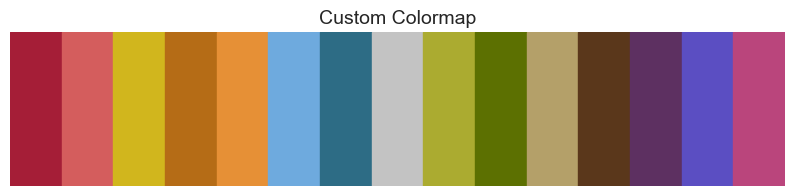

In [99]:
# define colors for the models

# base colors of QDS
base_colors = {
    "red": (165/255, 30/255, 55/255),
    "gray": (195/255, 195/255, 195/255),
    "lightgray": (203/255, 203/255, 203/255),
    "gold": (180/255, 160/255, 105/255),
}

hex_colors = [
    "#A51E37", "#D45D5D", "#D1B61D", "#B56C16", "#E69036",
    "#6EAADE", "#2D6C85", "#C3C3C3", "#ABAB30", "#5C7001",
    "#B4A069", "#5A371B", "#5D3061", "#5B4EC2", "#BA457C"
]

# Create a ListedColormap
custom_cmap = ListedColormap(hex_colors, name = "custom15")


# Visualize the colors
fig, ax = plt.subplots(figsize=(10, 2))
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(hex_colors))
ax.set_ylim(0, 1)
ax.axis("off")
plt.title("Custom Colormap", fontsize=14)
plt.show()

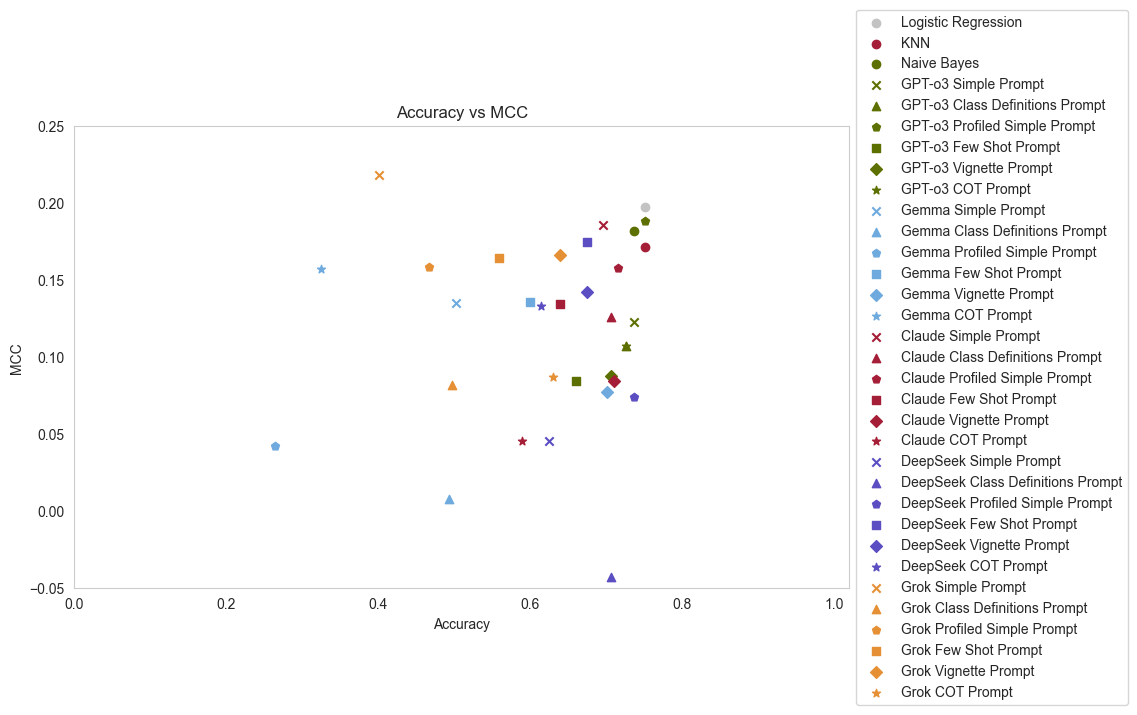

In [125]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_lr_excl["accuracy"], metrics_lr_excl["mcc"], label = "Logistic Regression", color = hex_colors[7], marker = "o")
plt.scatter(metrics_knn_excl["accuracy"], metrics_knn_excl["mcc"], label = "KNN", color = hex_colors[0], marker = "o")
plt.scatter(metrics_nb_excl["accuracy"], metrics_nb_excl["mcc"], label = "Naive Bayes", color = hex_colors[9], marker = "o")

plt.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["accuracy"], metrics_GPT_o3_class_definitions_prompt["mcc"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["accuracy"], metrics_GPT_o3_cot_prompt["mcc"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["accuracy"], metrics_Gemma_simple_prompt["mcc"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["accuracy"], metrics_Gemma_class_def_prompt["mcc"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["accuracy"], metrics_Gemma_profiled_simple_prompt["mcc"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["accuracy"], metrics_Gemma_few_shot_prompt["mcc"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["accuracy"], metrics_Gemma_vignette_prompt["mcc"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["accuracy"], metrics_Gemma_cot_prompt["mcc"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["accuracy"], metrics_Claude_4_simple_prompt["mcc"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["accuracy"], metrics_Claude_4_class_def_prompt["mcc"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["accuracy"], metrics_Claude_4_profiled_simple_prompt["mcc"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["accuracy"], metrics_Claude_4_few_shot_prompt["mcc"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["accuracy"], metrics_Claude_4_vignette_prompt["mcc"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["accuracy"], metrics_Claude_4_cot_prompt["mcc"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["accuracy"], metrics_DeepSeek_simple_prompt["mcc"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["accuracy"], metrics_DeepSeek_class_def_prompt["mcc"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["accuracy"], metrics_DeepSeek_profiled_simple_prompt["mcc"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt["accuracy"], metrics_DeepSeek_few_shot_prompt["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["accuracy"], metrics_DeepSeek_vignette_prompt["mcc"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["accuracy"], metrics_DeepSeek_cot_prompt["mcc"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["accuracy"], metrics_Grok_class_def_prompt["mcc"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["accuracy"], metrics_Grok_profiled_simple_prompt["mcc"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["accuracy"], metrics_Grok_few_shot_prompt["mcc"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["accuracy"], metrics_Grok_vignette_prompt["mcc"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["accuracy"], metrics_Grok_cot_prompt["mcc"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")


# plt.xlim(0.2, 0.8)
plt.ylim(-0.05, 0.25)

plt.xlim(0, 1.02)
# plt.ylim(-1.02, 1.02)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_all_models.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs_ML_0_1.png", dpi = 300, bbox_inches = "tight")

In [103]:
metrics_nb_excl

{'accuracy': 0.7360406091370558,
 'macro_f1': 0.5667472468439431,
 'micro_f1': 0.7360406091370558,
 'mcc': np.float64(0.18209009660000677),
 'precision': np.float64(0.4782608695652174),
 'recall': np.float64(0.21568627450980393),
 'sensitivity': np.float64(0.21568627450980393),
 'specificity': np.float64(0.9178082191780822),
 'roc_auc': np.float64(0.5667472468439432)}

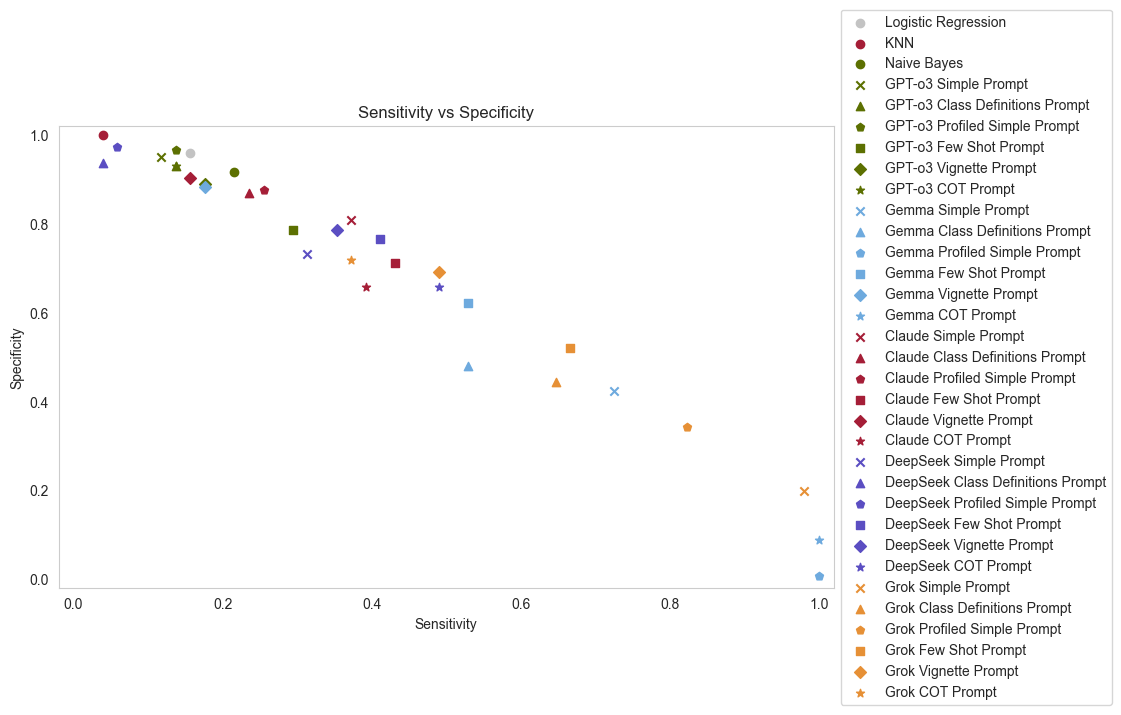

In [101]:
# plot sensitivity vs specificity for all simple prompts
plt.figure(figsize = (10, 6))

plt.scatter(metrics_lr_excl["sensitivity"], metrics_lr_excl["specificity"], label = "Logistic Regression", color = hex_colors[7], marker = "o")
plt.scatter(metrics_knn_excl["sensitivity"], metrics_knn_excl["specificity"], label = "KNN", color = hex_colors[0], marker = "o")
plt.scatter(metrics_nb_excl["sensitivity"], metrics_nb_excl["specificity"], label = "Naive Bayes", color = hex_colors[9], marker = "o")

plt.scatter(metrics_GPT_o3_simple_prompt["sensitivity"], metrics_GPT_o3_simple_prompt["specificity"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["sensitivity"], metrics_GPT_o3_class_definitions_prompt["specificity"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], metrics_GPT_o3_profiled_simple_prompt["specificity"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["sensitivity"], metrics_GPT_o3_few_shot_prompt["specificity"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["sensitivity"], metrics_GPT_o3_vignette_prompt["specificity"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["sensitivity"], metrics_GPT_o3_cot_prompt["specificity"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["sensitivity"], metrics_Gemma_simple_prompt["specificity"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["sensitivity"], metrics_Gemma_class_def_prompt["specificity"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["sensitivity"], metrics_Gemma_profiled_simple_prompt["specificity"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["sensitivity"], metrics_Gemma_few_shot_prompt["specificity"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["sensitivity"], metrics_Gemma_vignette_prompt["specificity"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["sensitivity"], metrics_Gemma_cot_prompt["specificity"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["sensitivity"], metrics_Claude_4_simple_prompt["specificity"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["sensitivity"], metrics_Claude_4_class_def_prompt["specificity"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["sensitivity"], metrics_Claude_4_profiled_simple_prompt["specificity"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["sensitivity"], metrics_Claude_4_few_shot_prompt["specificity"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["sensitivity"], metrics_Claude_4_vignette_prompt["specificity"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["sensitivity"], metrics_Claude_4_cot_prompt["specificity"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["sensitivity"], metrics_DeepSeek_simple_prompt["specificity"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["sensitivity"], metrics_DeepSeek_class_def_prompt["specificity"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], metrics_DeepSeek_profiled_simple_prompt["specificity"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt["sensitivity"], metrics_DeepSeek_few_shot_prompt["specificity"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["sensitivity"], metrics_DeepSeek_vignette_prompt["specificity"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["sensitivity"], metrics_DeepSeek_cot_prompt["specificity"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["sensitivity"], metrics_Grok_simple_prompt["specificity"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["sensitivity"], metrics_Grok_class_def_prompt["specificity"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["sensitivity"], metrics_Grok_profiled_simple_prompt["specificity"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["sensitivity"], metrics_Grok_few_shot_prompt["specificity"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["sensitivity"], metrics_Grok_vignette_prompt["specificity"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["sensitivity"], metrics_Grok_cot_prompt["specificity"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/sensitivity_specificity_LLMs.png", dpi = 300, bbox_inches = "tight")

# 4 Print metrics

In [111]:
print(f"""Metrics for all ML models:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Logistic Regression | {round(metrics_lr_excl["accuracy"], 2)} | {round(metrics_lr_excl["mcc"], 2)} | {round(metrics_lr_excl["sensitivity"], 2)} | {round(metrics_lr_excl["specificity"], 2)} | {round(metrics_lr_excl["precision"], 2)} | {round(metrics_lr_excl["macro_f1"], 2)}
Naive Bayes         | {round(metrics_nb_excl["accuracy"], 2)} | {round(metrics_nb_excl["mcc"], 2)} | {round(metrics_nb_excl["sensitivity"], 2)} | {round(metrics_nb_excl["specificity"], 2)} | {round(metrics_nb_excl["precision"], 2)} | {round(metrics_nb_excl["macro_f1"], 2)}
K-Nearest Neighb    | {round(metrics_knn_excl["accuracy"], 2)} | {round(metrics_knn_excl["mcc"], 2)} | {round(metrics_knn_excl["sensitivity"], 2)} | {round(metrics_knn_excl["specificity"], 2)} | {round(metrics_knn_excl["precision"], 2)} | {round(metrics_knn_excl["macro_f1"], 2)}
""")

Metrics for all ML models:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Logistic Regression | 0.75 | 0.2 | 0.16 | 0.96 | 0.57 | 0.56
Naive Bayes         | 0.74 | 0.18 | 0.22 | 0.92 | 0.48 | 0.57
K-Nearest Neighb    | 0.75 | 0.17 | 0.04 | 1.0 | 1.0 | 0.52



In [112]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_simple_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_simple_prompt["mcc"], 2)} | {round(metrics_GPT_o3_simple_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_simple_prompt["specificity"], 2)} | {round(metrics_GPT_o3_simple_prompt["precision"], 2)} | {round(metrics_GPT_o3_simple_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_simple_prompt["accuracy"], 2)} | {round(metrics_Gemma_simple_prompt["mcc"], 2)} | {round(metrics_Gemma_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemma_simple_prompt["specificity"], 2)} | {round(metrics_Gemma_simple_prompt["precision"], 2)} | {round(metrics_Gemma_simple_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_simple_prompt["accuracy"], 2)} | {round(metrics_Claude_4_simple_prompt["mcc"], 2)} | {round(metrics_Claude_4_simple_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_simple_prompt["specificity"], 2)} | {round(metrics_Claude_4_simple_prompt["precision"], 2)} | {round(metrics_Claude_4_simple_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_simple_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_simple_prompt["mcc"], 2)} | {round(metrics_DeepSeek_simple_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_simple_prompt["specificity"], 2)} | {round(metrics_DeepSeek_simple_prompt["precision"], 2)} | {round(metrics_DeepSeek_simple_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_simple_prompt["accuracy"], 2)} | {round(metrics_Grok_simple_prompt["mcc"], 2)} | {round(metrics_Grok_simple_prompt["sensitivity"], 2)} | {round(metrics_Grok_simple_prompt["specificity"], 2)} | {round(metrics_Grok_simple_prompt["precision"], 2)} | {round(metrics_Grok_simple_prompt["macro_f1"], 2)}
""")

Metrics for all simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.74 | 0.12 | 0.12 | 0.95 | 0.46 | 0.53
Gemma  | 0.5 | 0.14 | 0.73 | 0.42 | 0.31 | 0.58
Claude | 0.7 | 0.19 | 0.37 | 0.81 | 0.4 | 0.59
DeepS  | 0.62 | 0.05 | 0.31 | 0.73 | 0.29 | 0.52
Grok   | 0.4 | 0.22 | 0.98 | 0.2 | 0.3 | 0.59



In [113]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all class definition prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_class_definitions_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["mcc"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["specificity"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["precision"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_class_def_prompt["accuracy"], 2)} | {round(metrics_Gemma_class_def_prompt["mcc"], 2)} | {round(metrics_Gemma_class_def_prompt["sensitivity"], 2)} | {round(metrics_Gemma_class_def_prompt["specificity"], 2)} | {round(metrics_Gemma_class_def_prompt["precision"], 2)} | {round(metrics_Gemma_class_def_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_class_def_prompt["accuracy"], 2)} | {round(metrics_Claude_4_class_def_prompt["mcc"], 2)} | {round(metrics_Claude_4_class_def_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_class_def_prompt["specificity"], 2)} | {round(metrics_Claude_4_class_def_prompt["precision"], 2)} | {round(metrics_Claude_4_class_def_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_class_def_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_class_def_prompt["mcc"], 2)} | {round(metrics_DeepSeek_class_def_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_class_def_prompt["specificity"], 2)} | {round(metrics_DeepSeek_class_def_prompt["precision"], 2)} | {round(metrics_DeepSeek_class_def_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_class_def_prompt["accuracy"], 2)} | {round(metrics_Grok_class_def_prompt["mcc"], 2)} | {round(metrics_Grok_class_def_prompt["sensitivity"], 2)} | {round(metrics_Grok_class_def_prompt["specificity"], 2)} | {round(metrics_Grok_class_def_prompt["precision"], 2)} | {round(metrics_Grok_class_def_prompt["macro_f1"], 2)}
""")

Metrics for all class definition prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.73 | 0.11 | 0.14 | 0.93 | 0.41 | 0.53
Gemma  | 0.49 | 0.01 | 0.53 | 0.48 | 0.26 | 0.5
Claude | 0.71 | 0.13 | 0.24 | 0.87 | 0.39 | 0.55
DeepS  | 0.71 | -0.04 | 0.04 | 0.94 | 0.18 | 0.49
Grok   | 0.5 | 0.08 | 0.65 | 0.45 | 0.29 | 0.55



In [114]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all profiled simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["mcc"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["specificity"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["precision"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["precision"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["precision"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["mcc"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["specificity"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["precision"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Grok_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Grok_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Grok_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Grok_profiled_simple_prompt["precision"], 2)} | {round(metrics_Grok_profiled_simple_prompt["macro_f1"], 2)}
""")

Metrics for all profiled simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.75 | 0.19 | 0.14 | 0.97 | 0.58 | 0.55
Gemma  | 0.26 | 0.04 | 1.0 | 0.01 | 0.26 | 0.5
Claude | 0.72 | 0.16 | 0.25 | 0.88 | 0.42 | 0.57
DeepS  | 0.74 | 0.07 | 0.06 | 0.97 | 0.43 | 0.52
Grok   | 0.47 | 0.16 | 0.82 | 0.34 | 0.3 | 0.58



In [115]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all few shot prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_few_shot_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["mcc"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["specificity"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["precision"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_few_shot_prompt["accuracy"], 2)} | {round(metrics_Gemma_few_shot_prompt["mcc"], 2)} | {round(metrics_Gemma_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Gemma_few_shot_prompt["specificity"], 2)} | {round(metrics_Gemma_few_shot_prompt["precision"], 2)} | {round(metrics_Gemma_few_shot_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_few_shot_prompt["accuracy"], 2)} | {round(metrics_Claude_4_few_shot_prompt["mcc"], 2)} | {round(metrics_Claude_4_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_few_shot_prompt["specificity"], 2)} | {round(metrics_Claude_4_few_shot_prompt["precision"], 2)} | {round(metrics_Claude_4_few_shot_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_few_shot_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["mcc"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["specificity"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["precision"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_few_shot_prompt["accuracy"], 2)} | {round(metrics_Grok_few_shot_prompt["mcc"], 2)} | {round(metrics_Grok_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Grok_few_shot_prompt["specificity"], 2)} | {round(metrics_Grok_few_shot_prompt["precision"], 2)} | {round(metrics_Grok_few_shot_prompt["macro_f1"], 2)}
""")

Metrics for all few shot prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.66 | 0.08 | 0.29 | 0.79 | 0.33 | 0.54
Gemma  | 0.6 | 0.14 | 0.53 | 0.62 | 0.33 | 0.58
Claude | 0.64 | 0.13 | 0.43 | 0.71 | 0.34 | 0.57
DeepS  | 0.68 | 0.17 | 0.41 | 0.77 | 0.38 | 0.59
Grok   | 0.56 | 0.16 | 0.67 | 0.52 | 0.33 | 0.59



In [116]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all vignette prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_vignette_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_vignette_prompt["mcc"], 2)} | {round(metrics_GPT_o3_vignette_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_vignette_prompt["specificity"], 2)} | {round(metrics_GPT_o3_vignette_prompt["precision"], 2)} | {round(metrics_GPT_o3_vignette_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_vignette_prompt["accuracy"], 2)} | {round(metrics_Gemma_vignette_prompt["mcc"], 2)} | {round(metrics_Gemma_vignette_prompt["sensitivity"], 2)} | {round(metrics_Gemma_vignette_prompt["specificity"], 2)} | {round(metrics_Gemma_vignette_prompt["precision"], 2)} | {round(metrics_Gemma_vignette_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_vignette_prompt["accuracy"], 2)} | {round(metrics_Claude_4_vignette_prompt["mcc"], 2)} | {round(metrics_Claude_4_vignette_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_vignette_prompt["specificity"], 2)} | {round(metrics_Claude_4_vignette_prompt["precision"], 2)} | {round(metrics_Claude_4_vignette_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_vignette_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_vignette_prompt["mcc"], 2)} | {round(metrics_DeepSeek_vignette_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_vignette_prompt["specificity"], 2)} | {round(metrics_DeepSeek_vignette_prompt["precision"], 2)} | {round(metrics_DeepSeek_vignette_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_vignette_prompt["accuracy"], 2)} | {round(metrics_Grok_vignette_prompt["mcc"], 2)} | {round(metrics_Grok_vignette_prompt["sensitivity"], 2)} | {round(metrics_Grok_vignette_prompt["specificity"], 2)} | {round(metrics_Grok_vignette_prompt["precision"], 2)} | {round(metrics_Grok_vignette_prompt["macro_f1"], 2)}
""")

Metrics for all vignette prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.71 | 0.09 | 0.18 | 0.89 | 0.36 | 0.53
Gemma  | 0.7 | 0.08 | 0.18 | 0.88 | 0.35 | 0.53
Claude | 0.71 | 0.08 | 0.16 | 0.9 | 0.36 | 0.53
DeepS  | 0.68 | 0.14 | 0.35 | 0.79 | 0.37 | 0.57
Grok   | 0.64 | 0.17 | 0.49 | 0.69 | 0.36 | 0.59



In [117]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all CoT prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_cot_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_cot_prompt["mcc"], 2)} | {round(metrics_GPT_o3_cot_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_cot_prompt["specificity"], 2)} | {round(metrics_GPT_o3_cot_prompt["precision"], 2)} | {round(metrics_GPT_o3_cot_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_cot_prompt["accuracy"], 2)} | {round(metrics_Gemma_cot_prompt["mcc"], 2)} | {round(metrics_Gemma_cot_prompt["sensitivity"], 2)} | {round(metrics_Gemma_cot_prompt["specificity"], 2)} | {round(metrics_Gemma_cot_prompt["precision"], 2)} | {round(metrics_Gemma_cot_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_cot_prompt["accuracy"], 2)} | {round(metrics_Claude_4_cot_prompt["mcc"], 2)} | {round(metrics_Claude_4_cot_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_cot_prompt["specificity"], 2)} | {round(metrics_Claude_4_cot_prompt["precision"], 2)} | {round(metrics_Claude_4_cot_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_cot_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_cot_prompt["mcc"], 2)} | {round(metrics_DeepSeek_cot_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_cot_prompt["specificity"], 2)} | {round(metrics_DeepSeek_cot_prompt["precision"], 2)} | {round(metrics_DeepSeek_cot_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_cot_prompt["accuracy"], 2)} | {round(metrics_Grok_cot_prompt["mcc"], 2)} | {round(metrics_Grok_cot_prompt["sensitivity"], 2)} | {round(metrics_Grok_cot_prompt["specificity"], 2)} | {round(metrics_Grok_cot_prompt["precision"], 2)} | {round(metrics_Grok_cot_prompt["macro_f1"], 2)}
""")

Metrics for all CoT prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.73 | 0.11 | 0.14 | 0.93 | 0.41 | 0.53
Gemma  | 0.32 | 0.16 | 1.0 | 0.09 | 0.28 | 0.54
Claude | 0.59 | 0.05 | 0.39 | 0.66 | 0.29 | 0.52
DeepS  | 0.61 | 0.13 | 0.49 | 0.66 | 0.33 | 0.57
Grok   | 0.63 | 0.09 | 0.37 | 0.72 | 0.32 | 0.55



In [118]:
def average_prompt_metrics(metrics_GPT, metrics_Gemma, metrics_Claude, metrics_DeepSeek, metrics_Grok):
    accuracy = np.mean([
            metrics_GPT["accuracy"],
            metrics_Gemma["accuracy"],
            metrics_Claude["accuracy"],
            metrics_DeepSeek["accuracy"],
            metrics_Grok["accuracy"]
    ])

    mcc = np.mean([
            metrics_GPT["mcc"],
            metrics_Gemma["mcc"],
            metrics_Claude["mcc"],
            metrics_DeepSeek["mcc"],
            metrics_Grok["mcc"]
    ])

    sensitivity = np.mean([
            metrics_GPT["sensitivity"],
            metrics_Gemma["sensitivity"],
            metrics_Claude["sensitivity"],
            metrics_DeepSeek["sensitivity"],
            metrics_Grok["sensitivity"]
    ])

    specificity = np.mean([
            metrics_GPT["specificity"],
            metrics_Gemma["specificity"],
            metrics_Claude["specificity"],
            metrics_DeepSeek["specificity"],
            metrics_Grok["specificity"]
    ])

    precision = np.mean([
            metrics_GPT["precision"],
            metrics_Gemma["precision"],
            metrics_Claude["precision"],
            metrics_DeepSeek["precision"],
            metrics_Grok["precision"]
    ])

    macro_f1 = np.mean([
            metrics_GPT["macro_f1"],
            metrics_Gemma["macro_f1"],
            metrics_Claude["macro_f1"],
            metrics_DeepSeek["macro_f1"],
            metrics_Grok["macro_f1"]
    ])

    return accuracy, mcc, sensitivity, specificity, precision, macro_f1

In [119]:
def average_LLM_metrics(metrics_simple, metrics_class_def, metrics_profiled_simple, metrics_few_shot, metrics_vignette, metrics_cot):
    accuracy = np.mean([
        metrics_simple["accuracy"],
        metrics_class_def["accuracy"],
        metrics_profiled_simple["accuracy"],
        metrics_few_shot["accuracy"],
        metrics_vignette["accuracy"],
        metrics_cot["accuracy"]
    ])

    mcc = np.mean([
        metrics_simple["mcc"],
        metrics_class_def["mcc"],
        metrics_profiled_simple["mcc"],
        metrics_few_shot["mcc"],
        metrics_vignette["mcc"],
        metrics_cot["mcc"]
    ])

    sensitivity = np.mean([
        metrics_simple["sensitivity"],
        metrics_class_def["sensitivity"],
        metrics_profiled_simple["sensitivity"],
        metrics_few_shot["sensitivity"],
        metrics_vignette["sensitivity"],
        metrics_cot["sensitivity"]
    ])

    specificity = np.mean([
        metrics_simple["specificity"],
        metrics_class_def["specificity"],
        metrics_profiled_simple["specificity"],
        metrics_few_shot["specificity"],
        metrics_vignette["specificity"],
        metrics_cot["specificity"]
    ])

    precision = np.mean([
        metrics_simple["precision"],
        metrics_class_def["precision"],
        metrics_profiled_simple["precision"],
        metrics_few_shot["precision"],
        metrics_vignette["precision"],
        metrics_cot["precision"]
    ])

    macro_f1 = np.mean([
        metrics_simple["macro_f1"],
        metrics_class_def["macro_f1"],
        metrics_profiled_simple["macro_f1"],
        metrics_few_shot["macro_f1"],
        metrics_vignette["macro_f1"],
        metrics_cot["macro_f1"]
    ])

    return accuracy, mcc, sensitivity, specificity, precision, macro_f1

In [120]:
average_simple_accuracy, average_simple_mcc, average_simple_sensitivity, average_simple_specificity, average_simple_precision, average_simple_f1 = average_prompt_metrics(
    metrics_GPT_o3_simple_prompt, metrics_Gemma_simple_prompt,
    metrics_Claude_4_simple_prompt, metrics_DeepSeek_simple_prompt, metrics_Grok_simple_prompt)

average_class_def_accuracy, average_class_def_mcc, average_class_def_sensitivity, average_class_def_specificity, average_class_def_precision, average_class_def_f1 = average_prompt_metrics(
    metrics_GPT_o3_class_definitions_prompt, metrics_Gemma_class_def_prompt, metrics_Claude_4_class_def_prompt, metrics_DeepSeek_class_def_prompt, metrics_Grok_class_def_prompt)

average_profiled_simple_accuracy, average_profiled_simple_mcc, average_profiled_simple_sensitivity, average_profiled_simple_specificity, average_profiled_simple_precision, average_profiled_simple_f1 = average_prompt_metrics(
    metrics_GPT_o3_profiled_simple_prompt, metrics_Gemma_profiled_simple_prompt,
    metrics_Claude_4_profiled_simple_prompt, metrics_DeepSeek_profiled_simple_prompt, metrics_Grok_profiled_simple_prompt)

average_few_shot_accuracy, average_few_shot_mcc, average_few_shot_sensitivity, average_few_shot_specificity, average_few_shot_precision, average_few_shot_f1 = average_prompt_metrics(
    metrics_GPT_o3_few_shot_prompt, metrics_Gemma_few_shot_prompt,
    metrics_Claude_4_few_shot_prompt, metrics_DeepSeek_few_shot_prompt, metrics_Grok_few_shot_prompt)

average_vignette_accuracy, average_vignette_mcc, average_vignette_sensitivity, average_vignette_specificity, average_vignette_precision, average_vignette_f1 = average_prompt_metrics(
    metrics_GPT_o3_vignette_prompt, metrics_Gemma_vignette_prompt,
    metrics_Claude_4_vignette_prompt, metrics_DeepSeek_vignette_prompt, metrics_Grok_vignette_prompt)

average_cot_accuracy, average_cot_mcc, average_cot_sensitivity, average_cot_specificity, average_cot_precision, average_cot_f1 = average_prompt_metrics(
    metrics_GPT_o3_cot_prompt, metrics_Gemma_cot_prompt,
    metrics_Claude_4_cot_prompt, metrics_DeepSeek_cot_prompt, metrics_Grok_cot_prompt)

In [121]:
print(f"""Average metrics for all prompts and LLMs:

Prompt | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Simple prompt    | {round(average_simple_accuracy, 2)} | {round(average_simple_mcc, 2)} | {round(average_simple_sensitivity, 2)} | {round(average_simple_specificity, 2)} | {round(average_simple_precision, 2)} | {round(average_simple_f1, 2)}
Class def prompt | {round(average_class_def_accuracy, 2)} | {round(average_class_def_mcc, 2)} | {round(average_class_def_sensitivity, 2)} | {round(average_class_def_specificity, 2)} | {round(average_class_def_precision, 2)} | {round(average_class_def_f1, 2)}
Profiled prompt  | {round(average_profiled_simple_accuracy, 2)} | {round(average_profiled_simple_mcc, 2)} | {round(average_profiled_simple_sensitivity, 2)} | {round(average_profiled_simple_specificity, 2)} | {round(average_profiled_simple_precision, 2)} | {round(average_profiled_simple_f1, 2)}
Few shot prompt  | {round(average_few_shot_accuracy, 2)} | {round(average_few_shot_mcc, 2)} | {round(average_few_shot_sensitivity, 2)} | {round(average_few_shot_specificity, 2)} | {round(average_few_shot_precision, 2)} | {round(average_few_shot_f1, 2)}
Vignette prompt  | {round(average_vignette_accuracy, 2)} | {round(average_vignette_mcc, 2)} | {round(average_vignette_sensitivity, 2)} | {round(average_vignette_specificity, 2)} | {round(average_vignette_precision, 2)} | {round(average_vignette_f1, 2)}
CoT prompt       | {round(average_cot_accuracy, 2)} | {round(average_cot_mcc, 2)} | {round(average_cot_sensitivity, 2)} | {round(average_cot_specificity, 2)} | {round(average_cot_precision, 2)} | {round(average_cot_f1, 2)}
""")

Average metrics for all prompts and LLMs:

Prompt | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Simple prompt    | 0.59 | 0.14 | 0.5 | 0.62 | 0.35 | 0.56
Class def prompt | 0.63 | 0.06 | 0.32 | 0.73 | 0.31 | 0.53
Profiled prompt  | 0.59 | 0.12 | 0.45 | 0.63 | 0.4 | 0.54
Few shot prompt  | 0.63 | 0.14 | 0.47 | 0.68 | 0.34 | 0.57
Vignette prompt  | 0.69 | 0.11 | 0.27 | 0.83 | 0.36 | 0.55
CoT prompt       | 0.58 | 0.11 | 0.48 | 0.61 | 0.32 | 0.54



In [122]:
average_GPT_o3_accuracy, average_GPT_o3_mcc, average_GPT_o3_sensitivity, average_GPT_o3_specificity, average_GPT_o3_precision, average_GPT_o3_f1 = average_LLM_metrics(
    metrics_GPT_o3_simple_prompt, metrics_GPT_o3_class_definitions_prompt, metrics_GPT_o3_profiled_simple_prompt,
    metrics_GPT_o3_few_shot_prompt, metrics_GPT_o3_vignette_prompt, metrics_GPT_o3_cot_prompt)

average_Gemma_accuracy, average_Gemma_mcc, average_Gemma_sensitivity, average_Gemma_specificity, average_Gemma_precision, average_Gemma_f1 = average_LLM_metrics(
    metrics_Gemma_simple_prompt, metrics_Gemma_class_def_prompt, metrics_Gemma_profiled_simple_prompt,
    metrics_Gemma_few_shot_prompt, metrics_Gemma_vignette_prompt, metrics_Gemma_cot_prompt)

average_Claude_accuracy, average_Claude_mcc, average_Claude_sensitivity, average_Claude_specificity, average_Claude_precision, average_Claude_f1 = average_LLM_metrics(
    metrics_Claude_4_simple_prompt, metrics_Claude_4_class_def_prompt, metrics_Claude_4_profiled_simple_prompt,
    metrics_Claude_4_few_shot_prompt, metrics_Claude_4_vignette_prompt, metrics_Claude_4_cot_prompt)

average_DeepSeek_accuracy, average_DeepSeek_mcc, average_DeepSeek_sensitivity, average_DeepSeek_specificity, average_DeepSeek_precision, average_DeepSeek_f1 = average_LLM_metrics(
    metrics_DeepSeek_simple_prompt, metrics_DeepSeek_class_def_prompt, metrics_DeepSeek_profiled_simple_prompt,
    metrics_DeepSeek_few_shot_prompt, metrics_DeepSeek_vignette_prompt, metrics_DeepSeek_cot_prompt)

average_Grok_accuracy, average_Grok_mcc, average_Grok_sensitivity, average_Grok_specificity, average_Grok_precision, average_Grok_f1 = average_LLM_metrics(
    metrics_Grok_simple_prompt, metrics_Grok_class_def_prompt, metrics_Grok_profiled_simple_prompt,
    metrics_Grok_few_shot_prompt, metrics_Grok_vignette_prompt, metrics_Grok_cot_prompt)

In [123]:
print(f"""Average metrics for all LLMs:

LLM | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(average_GPT_o3_accuracy, 2)} | {round(average_GPT_o3_mcc, 2)} | {round(average_GPT_o3_sensitivity, 2)} | {round(average_GPT_o3_specificity, 2)} | {round(average_GPT_o3_precision, 2)} | {round(average_GPT_o3_f1, 2)}
Gemma  | {round(average_Gemma_accuracy, 2)} | {round(average_Gemma_mcc, 2)} | {round(average_Gemma_sensitivity, 2)} | {round(average_Gemma_specificity, 2)} | {round(average_Gemma_precision, 2)} | {round(average_Gemma_f1, 2)}
Claude | {round(average_Claude_accuracy, 2)} | {round(average_Claude_mcc, 2)} | {round(average_Claude_sensitivity, 2)} | {round(average_Claude_specificity, 2)} | {round(average_Claude_precision, 2)} | {round(average_Claude_f1, 2)}
DeepS  | {round(average_DeepSeek_accuracy, 2)} | {round(average_DeepSeek_mcc, 2)} | {round(average_DeepSeek_sensitivity, 2)} | {round(average_DeepSeek_specificity, 2)} | {round(average_DeepSeek_precision, 2)} | {round(average_DeepSeek_f1, 2)}
Grok   | {round(average_Grok_accuracy, 2)} | {round(average_Grok_mcc, 2)} | {round(average_Grok_sensitivity, 2)} | {round(average_Grok_specificity, 2)} | {round(average_Grok_precision, 2)} | {round(average_Grok_f1, 2)}
""")

Average metrics for all LLMs:

LLM | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.72 | 0.12 | 0.17 | 0.91 | 0.43 | 0.54
Gemma  | 0.48 | 0.09 | 0.66 | 0.42 | 0.3 | 0.54
Claude | 0.68 | 0.12 | 0.31 | 0.8 | 0.37 | 0.56
DeepS  | 0.67 | 0.09 | 0.28 | 0.81 | 0.33 | 0.54
Grok   | 0.53 | 0.15 | 0.66 | 0.49 | 0.32 | 0.57

